In [59]:
from datetime import datetime 
import pandas as pd
from utils import simulator_period,save_sim_resuls
from subjects.corr_coef import CorrCoeff,TrendFunc
import numpy as np
import matplotlib.pyplot as plt


In [38]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [5]:
casino_fig=pd.read_csv('casino_fig.csv', parse_dates = ['Date'])
casino_fig['week_day'] = casino_fig['Date'].dt.dayofweek

In [6]:
casino_fig.head()

,Date,Heads,Day_Result,Total_Bets,Total_Hands,week_day
0,2022-01-01,30,-395.094315,50966.974326,2335,5
1,2022-01-02,30,-2491.235551,64589.087908,2307,6
2,2022-01-03,11,-47.780115,17794.526887,1479,0
3,2022-01-04,16,775.504826,24770.107611,1710,1
4,2022-01-05,14,752.968470,41960.076654,2325,2


In [7]:
# ! pip install sktime

In [8]:
head_serias = casino_fig[['Date','Heads']]

In [9]:
head_serias = head_serias.set_index('Date')

In [10]:
head_serias

,Heads
Date,
2022-01-01,30
2022-01-02,30
2022-01-03,11
2022-01-04,16
2022-01-05,14
...,...
2024-12-28,48
2024-12-29,30
2024-12-30,23


In [33]:
head_serias_train = head_serias[head_serias.index < datetime(2024,11,1) ]
head_serias_test = head_serias[head_serias.index >= datetime(2024,11,1) ]


In [89]:
test_size = 14

In [90]:
from sktime.forecasting.model_selection import temporal_train_test_split
head_train, head_test = temporal_train_test_split(head_serias, test_size=test_size)

In [91]:
fh = np.arange(1, test_size)

In [92]:
# from sktime.forecasting.base import ForecastingHorizon

# fh = ForecastingHorizon(
#     pd.PeriodIndex(pd.date_range("2024-11-01", periods=6, freq="D")), is_relative=False
# )
# fh

In [93]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=7)
forecaster.fit(head_train);

head_pred = forecaster.predict(fh);
# smape_loss(y_test, y_pred);

/home/an/.config/jupyterlab-desktop/envs/env_sktime/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/an/.config/jupyterlab-desktop/envs/env_sktime/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/an/.config/jupyterlab-desktop/envs/env_sktime/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/an/.config/jupyterlab-desktop/envs/env_sktime/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/an/.config/jupyterlab-desktop/envs/env_sktime/lib/

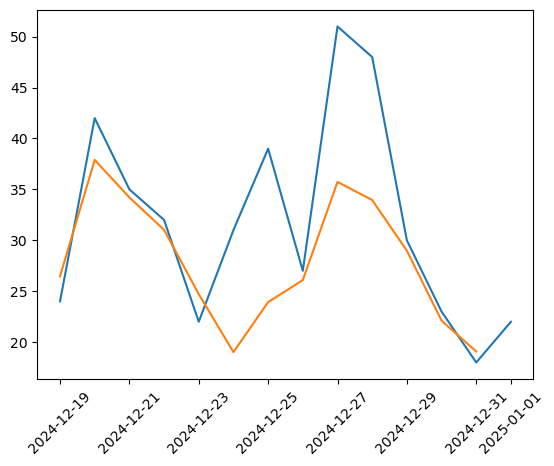

In [94]:
plt.plot(head_test)
plt.plot(head_pred)
plt.tick_params(axis='x', labelrotation=45)

In [84]:
# plr_res = np.random.choice([-90,180], size = 100, p = [25/37, 12/37]) 
# plt.plot(plr_res.cumsum())
# plt.plot(plr_res)

In [99]:
from sktime.forecasting.ets import AutoETS

In [100]:
forecaster_ets = AutoETS(auto=True,  n_jobs=-1, sp=7) 
forecaster_ets.fit(head_train) 

/home/an/.config/jupyterlab-desktop/envs/env_sktime/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_sktime/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_sktime/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_sktime/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-

AutoETS(auto=True, n_jobs=-1, sp=7)

In [101]:
head_pred_ets = forecaster_ets.predict(fh)

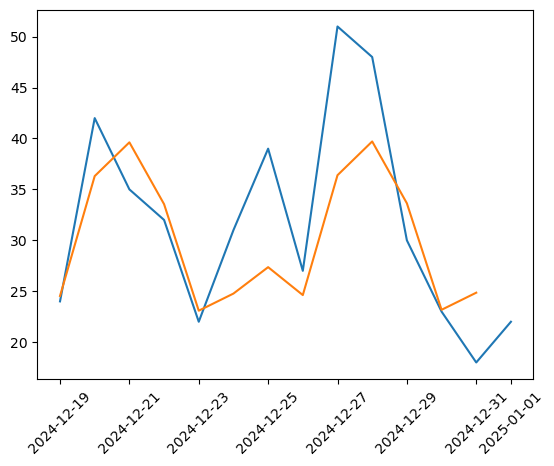

In [102]:
plt.plot(head_test)
plt.plot(head_pred_ets)
plt.tick_params(axis='x', labelrotation=45)